In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
w_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0,3,130)

In [4]:
y = w_true * x + b_true + np.random.randn(*x.shape) * 0.5

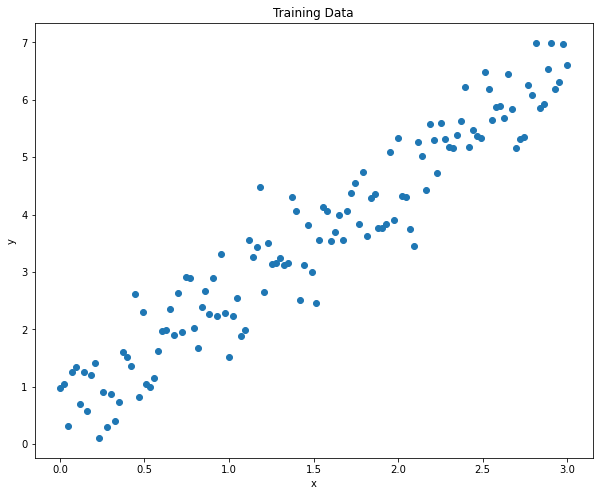

In [5]:
plt.figure(figsize = (10,8))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

In [17]:
class LinearModel:
    
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(),name = 'w')
        self.bias = tf.Variable(np.random.randn(),name = 'b')
        
    def __call__(self,x):
        return self.weight*x + self.bias
    

In [18]:
def loss(y,y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [22]:
def train(linear_model, x , y ,lr = 0.01):
    with tf.GradientTape() as tape:
        
        y_pred = linear_model(x)
        
        current_loss = loss(y,y_pred)

    d_weight,d_bias = tape.gradient(current_loss,[linear_model.weight,linear_model.bias]) 
    
    linear_model.weight.assign_sub(lr * d_weight)

    linear_model.bias.assign_sub(lr * d_bias)

In [37]:
linear_model = LinearModel()

weights,biases = [],[]

epochs = 100

lr = 0.15

In [38]:
for epoch_count in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    
    train(linear_model, x , y , lr = lr)
    
    print(f"Epoch Count {epoch_count}: loss value: {real_loss.numpy()}")

Epoch Count 0: loss value: 7.065597057342529
Epoch Count 1: loss value: 0.7016088962554932
Epoch Count 2: loss value: 0.5371600985527039
Epoch Count 3: loss value: 0.5043303966522217
Epoch Count 4: loss value: 0.4776366353034973
Epoch Count 5: loss value: 0.45409485697746277
Epoch Count 6: loss value: 0.4332917630672455
Epoch Count 7: loss value: 0.414907842874527
Epoch Count 8: loss value: 0.3986618220806122
Epoch Count 9: loss value: 0.3843051493167877
Epoch Count 10: loss value: 0.37161797285079956
Epoch Count 11: loss value: 0.36040619015693665
Epoch Count 12: loss value: 0.3504983186721802
Epoch Count 13: loss value: 0.3417425751686096
Epoch Count 14: loss value: 0.33400505781173706
Epoch Count 15: loss value: 0.3271673619747162
Epoch Count 16: loss value: 0.32112476229667664
Epoch Count 17: loss value: 0.31578490138053894
Epoch Count 18: loss value: 0.31106603145599365
Epoch Count 19: loss value: 0.3068958520889282
Epoch Count 20: loss value: 0.30321070551872253
Epoch Count 21: l

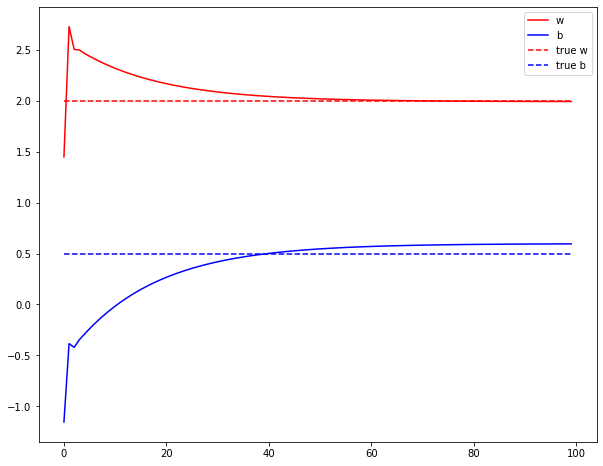

In [39]:
plt.figure(figsize = (10,8))

plt.plot(range(epochs),weights, 'r', range(epochs) , biases , 'b')
plt.plot([w_true] * epochs, 'r--', [b_true] * epochs, 'b--')
plt.legend(['w','b','true w','true b'])

In [40]:
linear_model.weight.numpy(),linear_model.bias.numpy()

(1.9906998, 0.5947234)

In [41]:
rmse = loss(y,linear_model(x))
rmse.numpy()

0.27520815

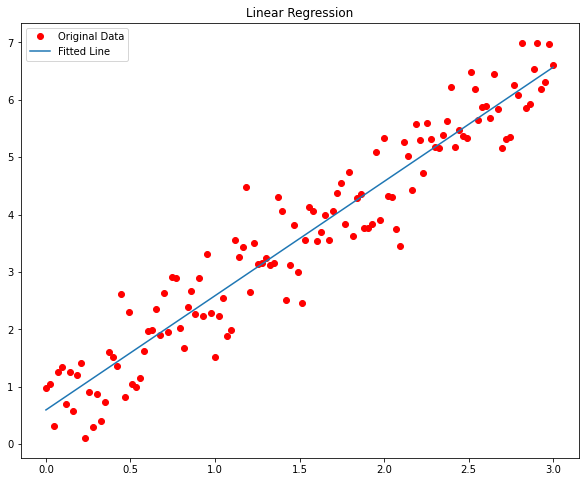

In [42]:
plt.figure(figsize = (10,8))

plt.plot(x,y, 'ro', label = 'Original Data')
plt.plot(x,linear_model(x),label = 'Fitted Line')

plt.title("Linear Regression")

plt.legend()
plt.show()

* The above Process we can do easily by using tensorflow keras library

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

In [44]:
x.shape,y.shape

((130,), (130,))

In [45]:
x = pd.DataFrame(x, columns = ['x'])
y = pd.DataFrame(y, columns = ['y'])

In [46]:
x.head()

,x
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023


In [47]:
y.head()

,y
0,0.981929
1,1.054848
2,0.313762
3,1.257037
4,1.350647


In [48]:
x.shape,y.shape

((130, 1), (130, 1))

In [49]:
model = keras.Sequential([layers.Dense(1, input_shape = (1,),activation = 'linear')])

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)

model.compile(loss = 'mse', metrics = ['mse'], optimizer = optimizer)

In [50]:
model.fit(x, y, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 37.2711 - mse: 37.2711
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 34.9401 - mse: 34.9401
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 32.1237 - mse: 32.1237
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 29.7804 - mse: 29.7804
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 27.9163 - mse: 27.9163
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 25.6578 - mse: 25.6578
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 23.6443 - mse: 23.6443
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 22.0341 - mse: 22.0341
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 20.5242 - mse: 20.5242
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 19.0000 - mse: 19.0000
Epoch 11/100
5/5 [==============================] - 0s 3ms/

5/5 [==============================] - 0s 2ms/step - loss: 0.4683 - mse: 0.4683
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4636 - mse: 0.4636
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4591 - mse: 0.4591
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4566 - mse: 0.4566
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4538 - mse: 0.4538
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4496 - mse: 0.4496
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4474 - mse: 0.4474
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4451 - mse: 0.4451
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4436 - mse: 0.4436
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4411 - mse: 0.4411
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4397 - ms

In [51]:
y_pred = model.predict(x)

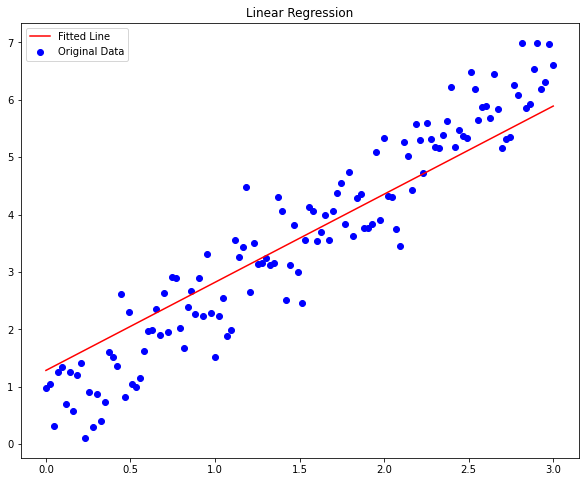

In [52]:
plt.figure(figsize = (10,8))

plt.scatter(x, y, c = 'blue', label = 'Original Data')

plt.plot(x, y_pred, color = 'r', label = 'Fitted Line')

plt.title('Linear Regression')
plt.legend()
plt.show()